## Cálculo de la constante de equilibrio de la reacción

$N_2O_4 <--> 2 NO_2$                           a 298 K

Para el desarrollo de este tutorial hemos escogido como ejemplo un equilibrio químico muy simple, el de la descomposición del tetróxido de nitrógeno en dióxido de nitrógeno a 298 K y una presión de 1.0 bar.
Para hacerlo lo más simple posible trataremos el sistema como una mezcla de gases ideales, evitando así, el uso de las fugacidades de tal forma que nos concentremos en el concepto fundamental del potencial químico para el cálculo de la constante de equilibrio.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Iniciamos nuestro programa importando el módulo numpy para realizar los cálculos numéricos y matplotlib.pyplot para las gráficas

Enlace para acceder a las tablas termodinámicas del NIST

https://janaf.nist.gov
https://webbook.nist.gov/chemistry/


In [3]:
##Estos valores se obtienen del sitio web del janaf.NIST
##Entalpía y entropía estandar a 298.15 K y 1 bar
deltaH_NO2=33.095   #kJ/mol
deltaS_NO2=240.034  #J/mol
deltaH_N2O4=9.079   #kJ/mol
deltaS_N2O4=304.376 #J/mol

T=298.15     #K

R=8.314 #J/K-mol

Para el cálculo de la energía libre necesitamos los valores de la entalpía y entropía estándar del tetróxido de nitrógeno y del dióxido de nitrogeno. Para acceder a estos valores, utilizaremos las tablas de propiedades termodinámicas del Webbook del NIST o del sitio web janaf.nist.gov. utilizando los enlaces que se muestran aqui.


## Calculamos la energía libre estándar

$\Delta G^o=\Delta H^o - T* \Delta S^o $

Para cada gas calculamos la energía libre de Gibbs

In [4]:
deltaG_NO2=deltaH_NO2*1000-T*deltaS_NO2
deltaG_N2O4=deltaH_N2O4*1000-T*deltaS_N2O4
print(deltaG_NO2,deltaG_N2O4)

-38471.13709999999 -81670.70439999999


Para un compuesto puro, a una tempeartura de 298 K y una presión de 1.0 bar,  el potencial químico estándar $\mu_B^o$ es igual a la energía libre estándar $G_{298}^o$, por lo tanto tenemos que

In [5]:
uo_N2O4_est=deltaG_N2O4
uo_NO2_est=deltaG_NO2

### Potencial químico en función de T,p y $x_B$

$\mu_B(T,p,x_B)=\mu_B^o(T)+R*T*\ln(x_B)+R*T*\ln(p/p_o)$<br><br>
en condiciones estándares $p=1.0$ bar, por lo que el último termino se hace cero

Si iniciamos con $n_{N_2O_4}=1.0$ y $n_{NO_2}=0$

Dado el avance de la reacción $\xi$, las fracciones molares correspondientes son:<br>
<br>
$n_{N_2O_4}=1-\xi$ <br>
$n_{NO_2}=2*\xi$<br>
$n_T=1+\xi$<br>
<br>
por tanto:<br>
<br>
$x_{N_2O_4}=(1-\xi)/(1+\xi)$ <br>
$x_{NO_2}=2*\xi/(1+\xi)$<br>


$\mu_{N_2O_4}(T,p,\xi)=\mu_{N_2O_4}^o(T)+R*T*\ln((1-\xi)/(1+\xi))$<br><br>
$\mu_{NO_2}(T,p,\xi)=\mu_{NO_2}^o(T)+R*T*\ln((2*\xi)/(1+\xi))$

En lo que sigue, utilizaremos en el programa la variable "xi" ya que en python no se permite el uso del simbolo ξ como variable. El cálculo de los potenciales estándares para cada gas se realiza como se  presenta a continuación

In [6]:
#xi=ξ en las siguientes fórmulas

dxi=0.001
xi=np.arange(dxi,1.0,dxi)
u_N2O4=(uo_N2O4_est+R*T*np.log((1-xi)/(1+xi)))
u_NO2=(uo_NO2_est+R*T*np.log(2*xi/(1+xi)))


$G(T,p,\xi)=\sum n_B(\xi)*\mu_B(T,p,\xi)$

La energía libre en función de la temperatura, presión y composición se calcula como la suma del producto de el número de moles  de cada componente por su potencial a la misma temperatura, presión y composición.

In [7]:
uT=(1-xi)*u_N2O4+2*xi*u_NO2

Para un sistema en equilibrio químico, el potencial quimico alcanza un mínimo a un determinado valor de xi.
En nuestro programa uT es un vector que representa los potenciales químicos en el rango de xi desde 0 hasta 1.0.
con la función min de numpy buscamos el valor mínimo en este vector. luego utilizando la función where de numpy determinamos en índice correspondiente a este valor mínimo del potencial. Utilizando este mismo índice determinamos en valor de xi correspondiente.

[0.189]


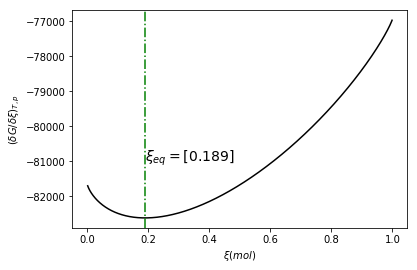

In [25]:
mu_minimo=np.min(uT)       
i=np.where(uT==mu_minimo)
print(xi[i])

plt.plot(xi,uT,color="black")
plt.text(xi[i],-81000,r'$\xi_{eq}=$'+str(xi[i]),fontsize=14)
plt.axvline(x=xi[i],color="green",linestyle="-.")
plt.xlabel(r'$\xi(mol)$')
plt.ylabel(r'$(\delta G/\delta \xi)_{T,p}$')
plt.show()

Un segundo método consiste en aplicar la ecuación de Gibbs-Duhem, de la cual resulta una expresión para la condición de equilibrio químico en la cual la suma de los coeficientes de balance nu sub B multiplicados por los potenciales químicos de cada una de las especies debe ser cero.
En nuestro ejemplo nu del NO2 corresponde a 2 y para el N2O4 es igual a 1
Para este sistema en particular de dos componentes en el equilibrio, el potencias del N2O4 debe ser igual a dos veces el potencial químico del NO2 por lo que se puede observar en la gráfica de estos dos potenciales que se cruzan en la composición correspondiente de equilibrio.

aplicando la ecuación de Gibbs-Duhem, obtenemos:<br>
<br>
$({\delta G}/{\delta \xi})_{T,p}=\sum_B \nu_B*\mu_B(T,p,\xi)$<br><br>
la condición de equilibrio químico es:<br><br>
$\sum_B \nu_B*\mu_B(T,p,\xi)=0$

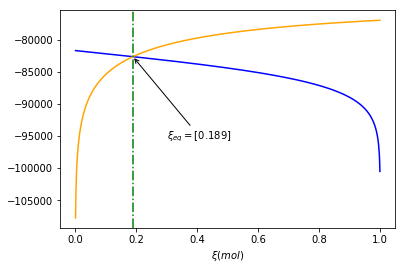

In [26]:
#Método 2
#El punto donde se cruzan las líneas de los dos potenciales NO2 y N2O4 corresponde al ξeq

plt.plot(xi,u_N2O4,color="blue")
plt.plot(xi,2*u_NO2,color="orange")
plt.annotate(r"$\xi_{eq}=$"+str(xi[i]), xy=(xi[i],u_N2O4[i]), xytext=(0.3,-95000),arrowprops={'arrowstyle': '->'}, va='center')
plt.xlabel(r'$\xi(mol)$')
plt.axvline(x=xi[i],color="green",linestyle="-.")
plt.show()

aplicando la ecuación de Gibbs-Duhem, obtenemos:<br>
<br>
$({\delta G}/{\delta \xi})_{T,p}=\sum_B \nu_B*\mu_B(T,p,\xi)$<br><br>
la condición de equilibrio químico es:<br><br>
$\sum_B \nu_B*\mu_B(T,p,\xi)=0$

Utilizando esta ecuación en forma más general, para sistemas de dos o mas componentes, calculamos esta sumatoria teniendo el cuidado de que la nu de los productos se consideran negativas y la de los reactivos positiva. Al elevar al cuadrado esta sumatoria al cuadrado obtenemos una función en xi que tiene un mínimo en el valor correspondiente a la composición de equilibrio. El mínimo lo calculamos de la misma manera como se realizó en el método anterior.

xi(equilibrio)=0.189 mol


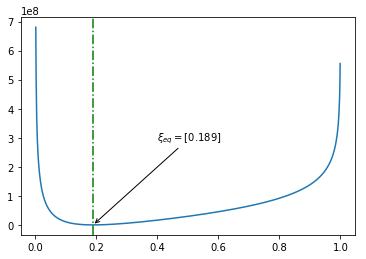

In [30]:
yy=(u_N2O4-2*u_NO2)**2
minimo=np.min(yy)
i=np.where(yy==minimo)
print("xi(equilibrio)="+str(xi[i][0])+" mol")

plt.plot(xi,yy)
plt.axvline(x=xi[i],color="green",linestyle="-.")
plt.annotate(r"$\xi_{eq}=$"+str(xi[i]), xy=(xi[i],yy[i]), xytext=(0.4,3E8),arrowprops={'arrowstyle': '->'}, va='center')
plt.show()